<a href="https://colab.research.google.com/github/jwdagney55/DSPS_JDagney/blob/main/HW6/HW6_Dagney_BetterPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv')

In [3]:
mw = mw[['#MW', 'Grand', 'Rotation', 'Curve']].rename({'#MW':"r", 'Grand':'v', 'Rotation':'dv', 'Curve':'err'},axis=1)
mw = mw[1:]

In [4]:
mw["r"] = [float(mw.iloc[i].r) for i in range(mw.shape[0])]
mw["v"] = [float(mw.iloc[i].v) for i in range(mw.shape[0])]
mw["dv"] = [float(mw.iloc[i].dv) for i in range(mw.shape[0])]
mw["err"] = [float(mw.iloc[i].err) for i in range(mw.shape[0])]
mw.head()

,r,v,dv,err
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870
5,0.021,110.386,33.817,14.427


In [5]:
mwRds = 56.70 / 2 #Kpc

In [34]:
def getradii(gal, gsize, n):
  '''returns distance, sqrt(distance) (uncertainty), velocity, err, and dv'''
  d = gal.iloc[0].r
  index = 1
  while(d <= n * gsize):
    #print(d, " is less than ", n * gsize)
    d = gal.iloc[index].r
    index+=1

  return d, np.sqrt(d), gal.iloc[index-1].v, gal.iloc[index-1].err, gal.iloc[index-1].dv

In [109]:
def plotGal(gal, rds):
  fig, ax = pl.subplots(figsize=(10,8))
  r = gal.r[16:]
  v = gal.v[16:]
  e = gal.err[16:]
  dv = gal.dv[16:]
  pl.xlim((0,4*mwRds))
  pl.ylim((0,350))
  pl.plot(r, v, 'k', markersize='5' ,label='v')
  ax.errorbar(r, v, fmt='.', yerr=e, color = 'black',  elinewidth =4)
  ax.errorbar(r, v,fmt='.', yerr=dv , color = 'black', elinewidth=1)
  n1 = getradii(gal, rds, 1)
  n2 = getradii(gal, rds, 2)
  n3 = getradii(gal, rds, 3)

  ax.errorbar(n1[0], n1[2], yerr = 0, fmt='o', color = 'steelblue', markersize=10, label = 'radius')
  ax.errorbar(n2[0], n2[2], yerr = 0, color = 'IndianRed', fmt='o', markersize=10, label = '2xradius')
  ax.errorbar(n3[0], n3[2], yerr = 0, color = 'Olive', fmt='o', markersize=10, label = '3xradius')
  pl.text(n1[0]-5, n1[2]-n1[4]-20, "{}\n({},{})".format(n1[2],n1[4], n1[3]))
  pl.text(n2[0]-5, n2[2]-n2[4]-20, "{}\n({},{})".format(n2[2],n2[4], n2[3]))
  pl.text(n3[0]-5, n3[2]-n3[4]-20, "{}\n({},{})".format(n3[2],n3[4], n3[3]))
  pl.text(10, 100, "Velocity (km/s)\n(dv, err)")
  pl.xlabel("Distance to Center (Kpc)")
  pl.ylabel("Velocity (km/s)")
  pl.legend(fontsize=15)

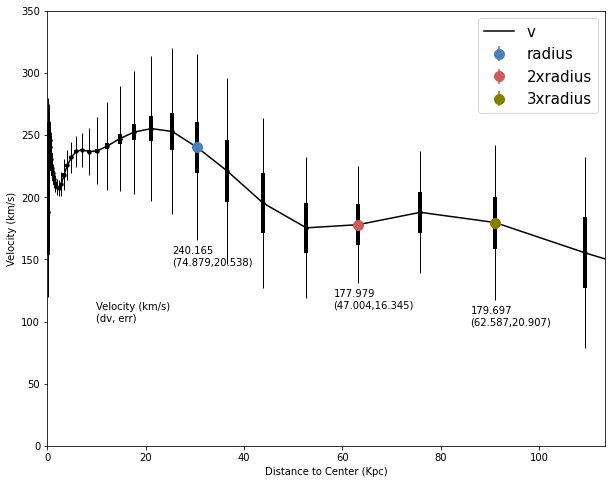

In [110]:
plotGal(mw, mwRds)